In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [34]:
#vacc_age_df = pd.read_hdf("../../data/external/vaccinations-by-age-group.h5")
#vacc_manu_df = pd.read_hdf("../../data/external/vaccinations-by-manufacturer.h5")
df = pd.read_hdf("../../data/processed/covid_data.h5")
df.head()

,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,people_fully_vaccinated_per_hundred,human_development_index,life_expectancy,median_age,population_density,aged_65_older_percentage,aged_70_older_percentage,total_cases_per_million_level
0,597.029,9.59,1803.987,0.50,25.61,0.511,64.83,18.6,54.422,6.275412e-08,3.250766e-08,0
1,304.195,10.08,11803.431,2.89,44.62,0.795,78.57,38.0,104.871,4.639875e-06,3.040828e-06,1
2,278.364,6.73,13913.839,1.90,14.43,0.748,76.88,29.1,17.348,1.383197e-07,8.589583e-08,0
3,276.045,3.94,5819.495,0.00,21.96,0.581,61.15,16.8,23.890,6.757707e-08,3.827026e-08,0
4,191.511,13.17,21490.943,3.80,66.53,0.778,77.02,32.1,231.845,7.393465e-05,4.938574e-05,1


Text(0.5, 1.0, 'total cases per million level')

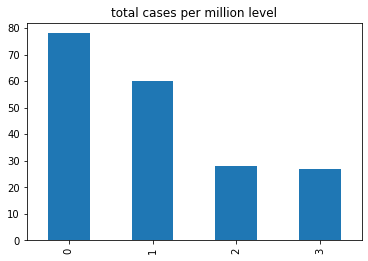

In [35]:
## Now we do an EDA to see some key characteristics of the dataset
# 1. Total cases per million histogram by level (0-3)
plt1 = df['total_cases_per_million_level'].value_counts().plot(kind='bar')
plt1.set_title("total cases per million level")

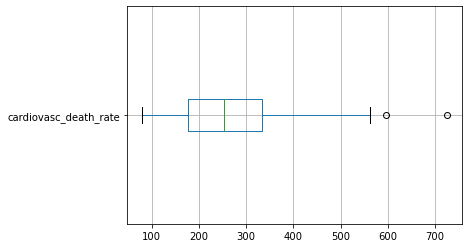

0.25    176.1925
0.50    252.6750
0.75    332.4330
Name: cardiovasc_death_rate, dtype: float64


In [42]:
# 2. Cardiovascular death rate related. 
# We use a box plot and print its quartile values (after dropping zero values)
df1 = df.loc[df["cardiovasc_death_rate"] > 0]
df1.boxplot('cardiovasc_death_rate', vert=False)
plt.show()

print(df1['cardiovasc_death_rate'].quantile([0.25, 0.5, 0.75]))

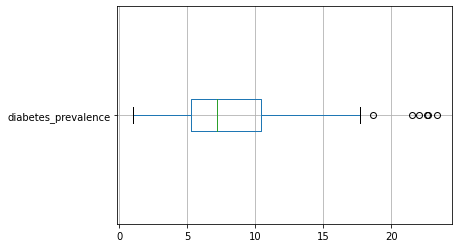

0.25     5.305
0.50     7.155
0.75    10.430
Name: diabetes_prevalence, dtype: float64


In [43]:
# 3. Diabetes prevalence related. 
# We use the same methods as in 2.
df1 = df.loc[df["diabetes_prevalence"] > 0]
df1.boxplot('diabetes_prevalence', vert=False)
plt.show()

print(df1['diabetes_prevalence'].quantile([0.25, 0.5, 0.75]))

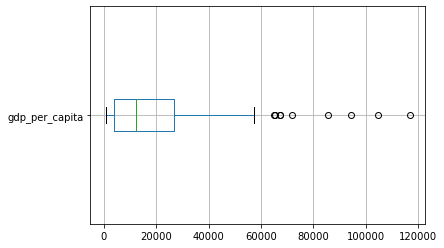

0.25     3823.194
0.50    12236.706
0.75    26808.164
Name: gdp_per_capita, dtype: float64


In [62]:
# 4. GDP per capita. 
# We use the same methods as in 2.
df1 = df.loc[df["gdp_per_capita"] > 0]
df1.boxplot('gdp_per_capita', vert=False)
plt.show()

print(df1['gdp_per_capita'].quantile([0.25,0.5,0.75]))

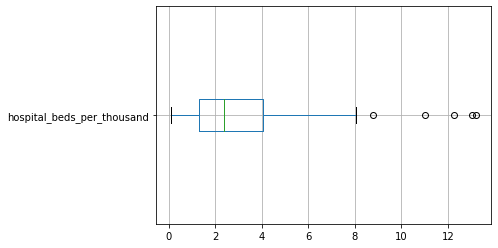

0.25    1.30
0.50    2.36
0.75    4.05
Name: hospital_beds_per_thousand, dtype: float64


In [63]:
# 5. hospital beds per thousand inhabitants. 
# We use the same methods as in 2.
df1 = df.loc[df["hospital_beds_per_thousand"] > 0]
df1.boxplot('hospital_beds_per_thousand', vert=False)
plt.show()

print(df1['hospital_beds_per_thousand'].quantile([0.25,0.5,0.75]))

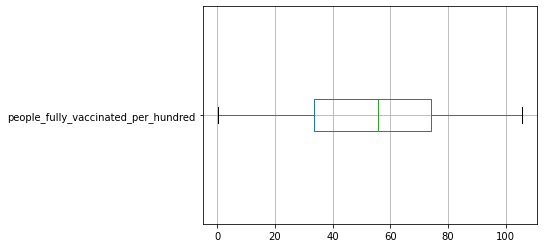

0.25    33.585
0.50    55.830
0.75    74.090
Name: people_fully_vaccinated_per_hundred, dtype: float64


In [64]:
# 6. people fully vaccinated per hundred
# We use the same methods as in 2.
df1 = df.loc[df["people_fully_vaccinated_per_hundred"] > 0]
df1.boxplot('people_fully_vaccinated_per_hundred', vert=False)
plt.show()

print(df1['people_fully_vaccinated_per_hundred'].quantile([0.25,0.5,0.75]))

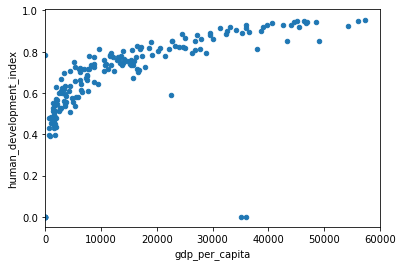

In [67]:
# 7. Relationship between gdp per capita and human dev. index. 
# We draw a scatter plot between these two. 
ax =df.plot.scatter(x="gdp_per_capita", y="human_development_index")
ax.set_xlim(0, 60000) #We omit the outliers 
plt.show()

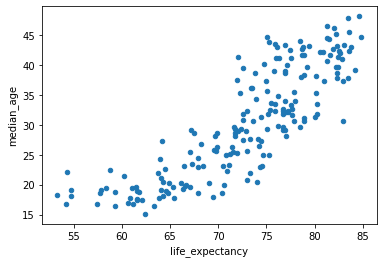

0.25    67.44
0.50    74.08
0.75    77.97
Name: life_expectancy, dtype: float64


In [73]:
# 8. Life expectancy vs. median age
# We use the same methods as in 2.
ax =df.plot.scatter(x="life_expectancy", y="median_age")
plt.show()

print(df1['life_expectancy'].quantile([0.25,0.5,0.75]))